### Librerías
> Aquí importo las librerías recomendadas en el notebook de la tarea 1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Dataframe unificado
> **3.1 a)** Genere un DataFrame único con toda la información de cada juego, incluyendo: nombres de artistas y diseñadores involucrados, mecánicas, categorías, tipo, familia y editorial. Guarde este DataFrame en un nuevo archivo CSV.

Primero, voy a generar los paths a los archivos con el módulo 'os'.

In [2]:
## Paths
path_de_juegos = os.path.join('data', 'bgg_GameItem.csv')
path_de_tipo_juego = os.path.join('data', 'bgg_GameType.csv')
path_de_personas = os.path.join('data', 'bgg_Person.csv')
path_de_publisher = os.path.join('data', 'bgg_Publisher.csv')
path_de_categorias = os.path.join('data', 'bgg_Category.csv')
path_de_mecanicas = os.path.join('data', 'bgg_Mechanic.csv')
path_de_familias = os.path.join('data', 'bgg_GameFamily.csv')

Carga de archivos, también corrige los datos de las columnas.

In [3]:
## Carga
data_juegos = pd.read_csv(path_de_juegos, delimiter=',').set_index('bgg_id')
data_tipo_juego = pd.read_csv(path_de_tipo_juego, delimiter=',').set_index('bgg_id')['name']
data_persona = pd.read_csv(path_de_personas, delimiter=',').set_index('bgg_id')['name']
data_publisher = pd.read_csv(path_de_publisher, delimiter=',').set_index('bgg_id')['name']
data_categoria = pd.read_csv(path_de_categorias, delimiter=',').set_index('bgg_id')['name']
data_mecanica = pd.read_csv(path_de_mecanicas, delimiter=',').set_index('bgg_id')['name']
data_familia = pd.read_csv(path_de_familias, delimiter=',').set_index('bgg_id')['name']


# Convertir columnas de data_juegos a "str" para eliminar "float", convertir en lista.
## Lista de columnas de juegos que voy a convertir de id a nombre.
columnas_a_convertir = ['game_type','designer', 'artist', 'publisher', 'category', 'mechanic', 'family']
## Hace que se repita para cada columna pedida.
for i in columnas_a_convertir:
    # Esto convierte los valores de las columnas de str/float a una lista con str.
    lista_creada = data_juegos[i].astype(str).str.split(',')
    
    # Si está en columna 'designer' o 'artist', es decir si tiene ID de persona.
    if i in ['designer', 'artist']:
        for lista in lista_creada:
            # Esto reemplaza los contenidos de las listas por el nombre de las personas.
            for j in range(len(lista)):
                if lista[j] != 'nan':
                    lista[j] = data_persona[int(lista[j])]
    
    # Si está en columna 'game_type', es decir si tiene ID de tipo de juego.
    elif i in ['game_type']:
        for lista in lista_creada:
            # Esto reemplaza los contenidos de las listas por tipo de juego.
            for j in range(len(lista)):
                if lista[j] != 'nan':
                    lista[j] = data_tipo_juego[int(lista[j])]

    # Si está en columna 'publisher', es decir si tiene IDs de sus publishers.
    elif i in ['publisher']:
        for lista in lista_creada:
            # Esto reemplaza los contenidos de las listas por nombre de editoriales.
            for j in range(len(lista)):
                if lista[j] != 'nan':
                    lista[j] = data_publisher[int(lista[j])]

    # Si está en columna 'category'.
    elif i in ['category']:
        for lista in lista_creada:
            # Esto reemplaza los contenidos de las listas por nombre de categorias.
            for j in range(len(lista)):
                if lista[j] != 'nan':
                    lista[j] = data_categoria[int(lista[j])]

    # Si está en columna 'mechanic'.
    elif i in ['mechanic']:
        for lista in lista_creada:
            # Esto reemplaza los contenidos de las listas por nombre de mecánicas.
            for j in range(len(lista)):
                if lista[j] != 'nan':
                    lista[j] = data_mecanica[int(lista[j])]

    # Si está en columna 'family'
    elif i in ['family']:
        for lista in lista_creada:
            # Esto reemplaza los contenidos de las listas por la familia a la que pertenece.
            for j in range(len(lista)):
                if lista[j] != 'nan':
                    lista[j] = data_familia[int(lista[j])]
                    
    # Guarda los cambios a la columna.
    data_juegos[i] = lista_creada

Ahora voy a crear el dataframe unificado con las mismas columnas del dataframe data_juegos.

In [4]:
dataframe_nuevo = data_juegos.copy()

dataframe_nuevo.head(2)

,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
bgg_id,,,,,,,,,,,,,,,,,,,,,
1,Die Macher,1986.0,[Strategy Game],[Karl-Heinz Schmiel],"[Marcus Gschwendtner, Harald Lieske]","[Hans im Glück, Moskito Spiele, Ediciones MasQ...",3.0,5.0,4.0,5.0,...,1.57510,7.06367,4.3144,1.166667,NaN,NaN,NaN,NaN,NaN,NaN
2,Dragonmaster,1981.0,[Strategy Game],"[G. W. ""Jerry"" D'Arcey]",[Bob Pepper],"[E.S. Lowe, Milton Bradley]",3.0,4.0,3.0,4.0,...,1.46752,5.76599,1.9636,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora que tengo un nuevo dataframe con toda la información pedida, lo voy a convertir de vuelta a un archivo '.CSV'.

In [5]:
dataframe_nuevo.to_csv('Dataframe_unificado_3.1_a.csv', sep=',')

> **3.1 b)** ¿Cuánto espacio en disco ocupa este DataFrame? ¿Cuánto espacio en disco ocupan los documentos CSV separados? ¿A qué se debe esta diferencia? Comente.

El dataframe unificado ocupa:
- **35,094** KB (**Dataframe_unificado_3.1_a.csv**)

Los documentos CSV separados ocupan: 
- 2 KB (**bgg_Category.csv**)
- 166 KB (**bgg_GameFamily.csv**)
- 15,701 KB (**bgg_GameItem.csv**)
- 1 KB (**bgg_GameType.csv**)
- 5 KB (**bgg_Mechanic.csv**)
- 1,135 KB (**bgg_Person.csv**)
- 583 KB (**bgg_Publisher.csv**)
- TOTAL: **17,593** KB

### ¿Por que la diferencia? 
En este caso el Dataframe unificado pesa más que todos los documentos '.CSV' separados porque en vez de ahorrar espacio solo usando IDs para referirse a cosas (Como lo hacen los archivos originales), uno de los requisitos del dataframe unificado era que los elementos de las columnas mostraran los nombres completos en vez de los IDs, lo cuál hace que haya mucho más texto que en los archivos originales.

## Juegos publicados anualmente
> **3.2 a)** Limpie los datos para dejar solo aquellos que tienen valores válidos de año de publicación. Luego responda: ¿cuál es el rango de años con el que estamos trabajando? ¿Tienen sentido estos años?

Para esto, voy a abrir el dataframe unificado hecho anteriormente, creando uno nuevo para modificar. También voy a añadir una fila con un año inválido para testear.

In [6]:
# Path y carga.
path_df_unificado = os.path.join('Dataframe_unificado_3.1_a.csv')
data_anos_validos = pd.read_csv(path_df_unificado, delimiter=',').set_index('bgg_id')
# Lo de abajo es para testear que se limpien los años inválidos.
data_anos_validos.loc[len(data_anos_validos)] = ['wagh', "año inválido", 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
data_anos_validos.tail(2)

,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
bgg_id,,,,,,,,,,,,,,,,,,,,,
392146,Nightmares of Sushi,2023.0,['nan'],['Geoffrey Chia'],['Geoffrey Chia'],['Good Spirit Games'],2.0,6.0,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113904,wagh,año inválido,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora que tengo el dataframe, voy a intentar eliminar todos los juegos sin años válidos, primero convirtiendo a los años que no sean números en "NaN" y después eliminandolos.

In [7]:
data_anos_validos['year'] = pd.to_numeric(data_anos_validos['year'], errors='coerce')
data_anos_validos = data_anos_validos.dropna(subset=['year'])
data_anos_validos.tail(2)

,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
bgg_id,,,,,,,,,,,,,,,,,,,,,
391834,SpellBook,2023.0,['nan'],['Phil Walker-Harding'],['Cyrille Bertin'],['Space Cowboys'],1.0,4.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392146,Nightmares of Sushi,2023.0,['nan'],['Geoffrey Chia'],['Geoffrey Chia'],['Good Spirit Games'],2.0,6.0,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora para saber el rango de años, voy a printear el valor máximo y mínimo en esa columna.

In [8]:
print(data_anos_validos['year'].max())
print(data_anos_validos['year'].min())

2026.0
-3500.0


### ¿Cuál es el rango de años?
El rango es desde el año -3500 al año 2026.

### ¿Tiene sentido el rango de años?
Eh, debatible. Podría tener sentido si el juego de 2026 va a ser un juego que va a ser lanzado en el futuro, y el juego de -3500 podría simplemente ser un juego publicado antes de Cristo, algo poco probable pero no directamente imposible.

> **3.2 b)** Seleccione solamente los juegos entre los años 1980 y 2025. Luego grafique la cantidad de juegos publicados por año. ¿Cómo es esta tendencia? Comente.

Voy a copiar el dataframe limpiado para empezar, y después voy a dropear todo lo que no esté en el rango.

In [9]:
data_rango = data_anos_validos.copy()
data_rango = data_rango[data_rango['year'] >= 1980]
data_rango = data_rango[data_rango['year'] <= 2025]
# Aquí quito los decimales de los años, todos son '.0' en este caso.
data_rango['year'] = data_rango['year'].astype('int')

Ahora que tengo solo los juegos en el rango 1980-2025, necesito graficarlos, mostrando cuantos fueron publicados por año.

Text(0.5, 1.0, 'Cantidad de juegos por año en el rango 1980-2025')

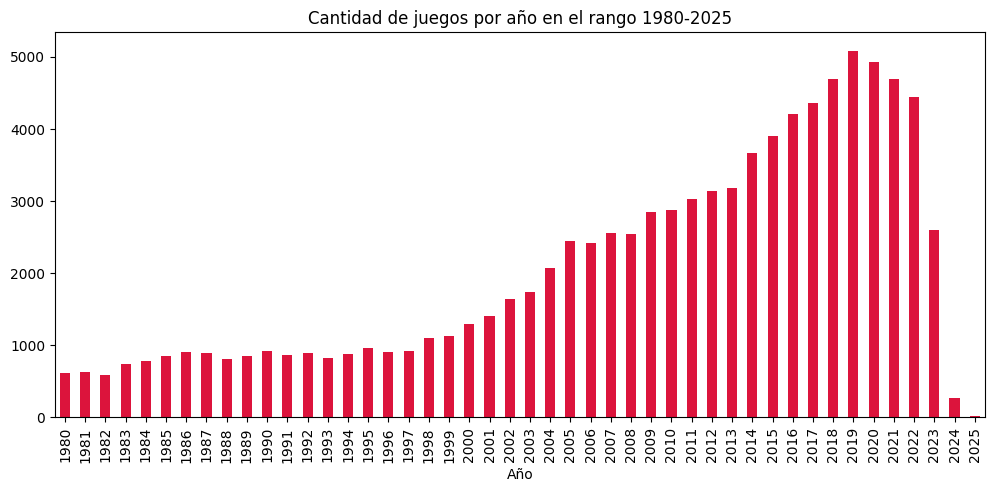

In [10]:
# Creo nuevo dataframe que solo va a tener años.
data_short = pd.DataFrame()

data_short['Año'] = data_rango['year']
# Esto cuenta cuantos juegos hay por cada año, después hago el gráfico con esa info.
year_count = data_short['Año'].value_counts()
year_count = year_count.sort_index(ascending = True)
aeiou = year_count.plot(kind='bar', figsize=(12, 5), color='crimson')
aeiou.set_title('Cantidad de juegos por año en el rango 1980-2025')


### ¿Cómo es la tendencia del gráfico?
Claramente muestra que cerca del año 2020 hubo un boom de juegos publicados, si yo tuviese que adivinar sin información adicional, diría que se debe eso por la pandemia.

## Análisis de duración y complejidad
> **3.3 a)** Inspecciones y filtre los datos que tengan valores válidos para: tiempo mínimo de juego, tiempo máximo de juego y complejidad. En el caso de que existan "outliers", puede descartarlos, cosiderando un rango razonable para las variables anteriores. Justifique su desición.

Lo primero que voy a hacer es determinar el tiempo mínimo de juego, lo cuál va a ser mayor a 0 horas, dado a que me imagino que se va a necesitar jugar por algo de tiempo para que el juego sea considerado jugado. Para el tiempo máximo, voy a considerar la duración aproximada del juego de mesa más largo de la historia, "The Campaign for North Africa", el cuál dura 1,500 horas, o 90,000 minutos. Es decir, el rango de tiempos válidos va a ser de **0 a 90,000 minutos**.

In [11]:
df_sin_filtrar = data_rango.copy()
print(df_sin_filtrar['min_time'].min(), '-', df_sin_filtrar['min_time'].max())
print('\n')
print(df_sin_filtrar['max_time'].min(), '-', df_sin_filtrar['max_time'].max())

1.0 - 157680.0


1.0 - 63072000.0


Asumiendo que el tiempo está en minutos, esto significa que hay valores que no entran en mi rango, por lo que los voy a eliminar.

In [12]:
# Hacer que 'min_time' y 'max_time' no sean mayores a 90,000 minutos.
df_filtrar = df_sin_filtrar[df_sin_filtrar['min_time'] <= 90000]
df_filtrar = df_filtrar[df_filtrar['max_time'] <= 90000]
# Asegurarse que 'min_time' y 'max_time' no sean igual o menores a 0 minutos.
df_filtrar = df_filtrar[df_filtrar['min_time'] > 0]
df_filtrar = df_filtrar[df_filtrar['max_time'] > 0]

# Printear nuevos rangos de tiempo.
print(df_filtrar['min_time'].min(), '-', df_filtrar['min_time'].max())
print('\n')
print(df_filtrar['max_time'].min(), '-', df_filtrar['max_time'].max())

1.0 - 60120.0


1.0 - 84000.0


Ahora que tengo solo los tiempos válidos, voy a ver la complejidad.

In [13]:
print(df_filtrar['complexity'].min(), '-', df_filtrar['complexity'].max())

1.0 - 5.0


Con esta información me imagino que es una escala del 1 al 5, por lo que voy a filtrar todos los valores **menores a 1** y **mayores a 5**. Pero primero voy a añadir información con complejidad fuera del rango para asegurarme que sea eliminada.

In [14]:
# Introducir errores.
df_filtrar.loc[len(df_filtrar)] = ['wagh', 1234, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0,0,0,0,0,0,0]
df_filtrar.loc[len(df_filtrar)] = ['wagh', 1234, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0]
# Printear para confirmar que ahora hay errores.
print(df_filtrar['complexity'].min(), '-', df_filtrar['complexity'].max(), '<-- Valores erroneos, no deberían estar después')

0.5 - 6.0 <-- Valores erroneos, no deberían estar después


In [15]:
# Filtrar complejidad.
df_filtrar = df_filtrar[df_filtrar['complexity'] >= 1]
df_filtrar = df_filtrar[df_filtrar['complexity'] <= 5]

# Printear complexidad filtrada.
print(df_filtrar['complexity'].min(), '-', df_filtrar['complexity'].max())

1.0 - 5.0


Ahora puedo ver que en efecto la complejidad fue filtrada correctamente aunque la data inicial no hubiese necesitado filtración.

> **3.3 b)** Veremos ahora si ha cambiado la duración promedio de los juegos de mesa en nuestro rango de años seleccionado. Primero, cree una nueva columna `avg_time` en el dataset con la duración promedio supuesta para cada juego.

In [16]:
# Hacer nueva columna sacando promedio de tiempo.
df_filtrar['avg_time'] = (df_filtrar['min_time'] + df_filtrar['max_time']) / 2

df_filtrar.head(3)

,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,...,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id,avg_time
bgg_id,,,,,,,,,,,,,,,,,,,,,
1,Die Macher,1986,['Strategy Game'],['Karl-Heinz Schmiel'],"['Marcus Gschwendtner', 'Harald Lieske']","['Hans im Glück', 'Moskito Spiele', 'Ediciones...",3.0,5.0,4.0,5.0,...,7.06367,4.3144,1.166667,NaN,NaN,NaN,NaN,NaN,NaN,240.0
2,Dragonmaster,1981,['Strategy Game'],"['G. W. ""Jerry"" D\'Arcey']",['Bob Pepper'],"['E.S. Lowe', 'Milton Bradley']",3.0,4.0,3.0,4.0,...,5.76599,1.9636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
3,Samurai,1998,['Strategy Game'],['Reiner Knizia'],['Franz Vohwinkel'],"['Fantasy Flight Games', 'Hans im Glück', '999...",2.0,4.0,2.0,4.0,...,7.22869,2.4784,1.006579,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Sip, funciona, ahora aparece la columna 'avg_time'.

> **3.3 c)** Grafique la duración promedio de juegos al año entre 1980 y 2025. ¿Existe alguna tendencia? Asegúrese de colocar las unidades correspondientes en sus ejes si es necesario. Comente sus resultados.

In [17]:
# Agrupa y consigue el promedio de los promedios de tiempo por cada año.
avg_time_por_year = df_filtrar.groupby('year')['avg_time'].mean()
avg_time_por_year.head(3)

year
1980    100.588608
1981    117.829825
1982     90.628253
Name: avg_time, dtype: float64

Ahora que tengo una cosa con ambos los años y los promedios por año, puedo hacer el gráfico.

Text(0, 0.5, 'Tiempo promedio (minutos)')

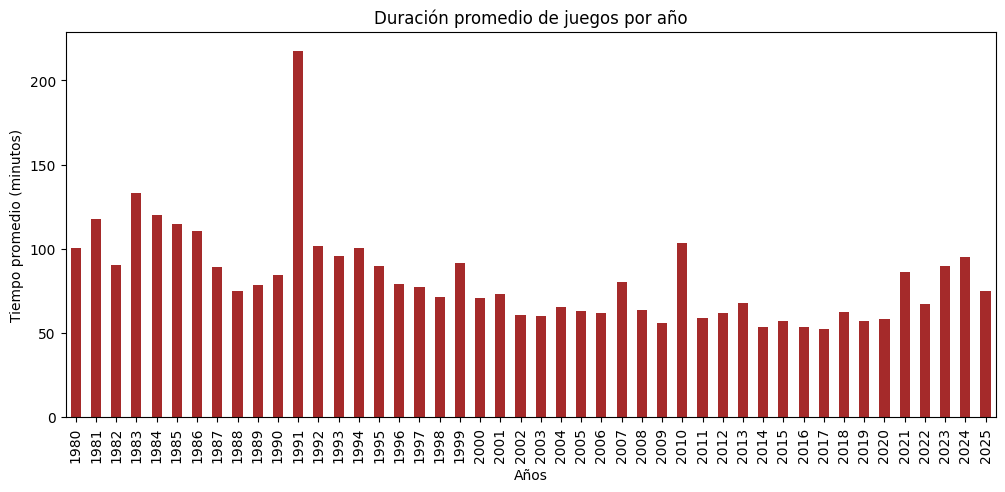

In [18]:
grafico = avg_time_por_year.plot(kind='bar', figsize=(12, 5), color='brown')
grafico.set_title('Duración promedio de juegos por año')
plt.xlabel("Años")
plt.ylabel("Tiempo promedio (minutos)")

No hay mucha información que realmente pueda sacar además de que al pasar los años los juegos parecen tener menor duración, pero algo que yo creo que si cabe resaltar es que en el año 1991 algún juego parece haber aumentado mucho el promedio, lo cuál podría ser un outlier.

> **3.3 d)** Nos interesa saber si los juegos de mesa recientes son más complejos que aquellos publicados antes de los 2000. BoardGameGeek permite evaluar la complejidad (o "weight") de un juego en una escala de 1 a 5, siendo 1 un juego "liviano" o fácil de entender, y 5 un juego "pesado" o complejo. Primero, seleccione los juegos que han sido evaluados por al menos 100 usuarios. Luego grafique la complejidad promedio de los juegos según año. Responda: ¿ha cambiado la percepción de complejidad entre juegos entre 1980 y la actualidad?

Primero, voy a crear un dataframe, removiendo todos los juegos con menos de 100 evaluaciones. Luego voy a graficarlos.

(0.0, 5.0)

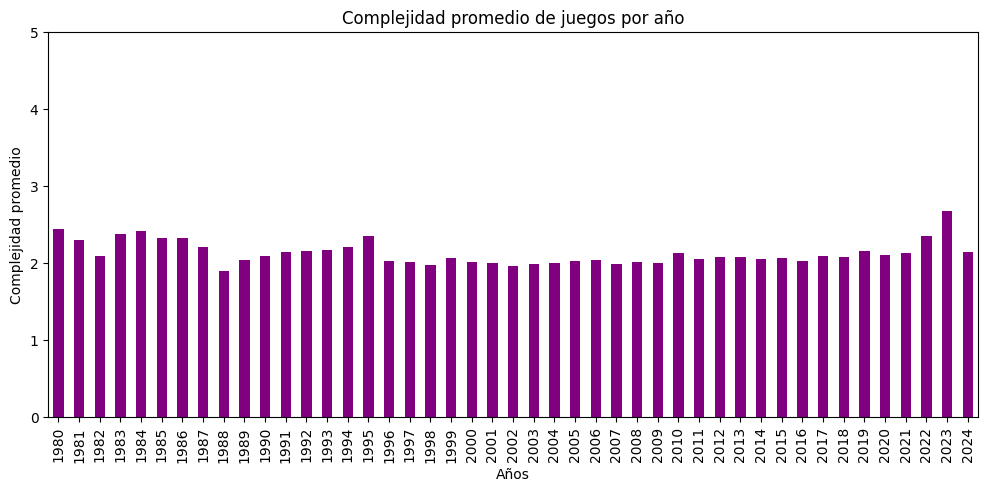

In [19]:
# df inicial
df_complejidad_entero = df_filtrar[df_filtrar['num_votes'] >= 100]

# Crear info para plot
comp_promedio = df_complejidad_entero.groupby('year')['complexity'].mean()

# Plotear
grafico_2 = comp_promedio.plot(kind='bar', figsize=(12, 5), color='purple')
grafico_2.set_title('Complejidad promedio de juegos por año')
plt.xlabel("Años")
plt.ylabel("Complejidad promedio")
plt.ylim(0, 5)

### ¿Ha cambiado la percepción de la complejidad entre juegos entre 1980 y la actualidad?
¿Tal vez? A lo menos se puede ver que antes de los 2000 la complejidad promedio era más alta pero fue bajando al pasar los años, pero no es un cambio suficientemente drástico como para estar seguro.

## Análisis de categorías comunes
> **3.4 a)** ¿Cuáles son las 5 categorías más comunes en los juegos del dataset? Muestre la cantidad de juegos que hay de cada una. Puede graficar estos valores, o bien, entregar un DataFrame con sus valores.

Voy a mover la información a un dict, y cuando esté lista la pasaré a dataframe.

In [86]:
# Crea un dict que se usará a continuación.
dict_categoria = dict()

# Por cada value en la columna de categorias, añade una categoría y cuenta cada vez ha aparecido.
for lista in dataframe_nuevo['game_type']:
    for cat in lista:
        dict_categoria[cat] = dict_categoria.get(cat, 0) + 1

# Remueve la categoria 'nan' del dict dado a que no es una categoria real.
dict_categoria.pop('nan')

# Se convierte el dict en un nuevo dataframe con las veces que ha aparecido la categoria
df_categoria = pd.DataFrame(dict_categoria.values(), index=dict_categoria.keys())
# Reemplaza el nombre por defecto de la columna y la sortea por cantidad de veces que aparecen.
df_categoria.rename(columns={0: 'Cantidad'}, inplace=True)
df_categoria = df_categoria.sort_values(by='Cantidad', ascending= False)

# Aquí guardo el dataframe a un archivo '.CSV'.
df_categoria.to_csv('Dataframe_categorias_3.4_a.csv', sep=',')

df_categoria.head()


,Cantidad
War Game,9779
Abstract Game,4923
Children's Game,4142
Family Game,3163
Strategy Game,2849


Las 5 categorías más comunes en orden descendiente son: "War Game", "Abstract Game", "Children's Game", "Family Game", y "Strategy Game".
Guardé esta información en el archivo 'Dataframe_categorias_3.4_a.csv' para la pregunta.

> **3.4 b)** Para cada una de estas 5 categorías, cree un DataFrame que contenga la cantidad de juegos en el dataset según año. Luego junte estos DataFrames en uno solo con los atributos de "Año", "Categoría" y "Cantidad".

Primero debo encontrar y recopilar estos datos.

In [116]:
# Hacer 5 dicts, con formato [año : cantidad]
dict_war = dict()  # War Game
dict_abs = dict()  # Abstract Game
dict_chi = dict()  # Children's Game
dict_fam = dict()  # Family Game
dict_str = dict()  # Strategy Game

# La parte inicial del for loop sacada de 'https://stackoverflow.com/a/23146038'.
for index, row in dataframe_nuevo.iterrows():
    for cat in row['game_type']:
        # Dependiendo de categoria crea o añade a una key en su respectivo dict.
        if cat == "War Game":
            dict_war[row['year']] = dict_war.get(row['year'], 0) + 1
        elif cat == "Abstract Game":
            dict_abs[row['year']] = dict_abs.get(row['year'], 0) + 1
        elif cat == "Children's Game":
            dict_chi[row['year']] = dict_chi.get(row['year'], 0) + 1
        elif cat == "Family Game":
            dict_fam[row['year']] = dict_fam.get(row['year'], 0) + 1
        elif cat == "Strategy Game":
            dict_str[row['year']] = dict_str.get(row['year'], 0) + 1      

In [134]:
# Ahora los convierto en dataframes.

# Crea el dataframe a partir de las cosas del dict.
df_war = pd.DataFrame(dict_war.items())
# Renombra columnas.
df_war.rename(columns={0 : 'Año', 1 : 'Cantidad'}, inplace=True)
# Añade nueva columna con nombre de su categoría para distinguirlos al juntarlos.
df_war.insert(loc=1, column='Categoría', value='War Game')
# Remueve todas las filas con año 'NaN'.
df_war = df_war[df_war['Año'].notna()]
# Convierte los años de float a int.
df_war['Año'] = df_war['Año'].astype(int)

df_abs = pd.DataFrame(dict_abs.items())
df_abs.rename(columns={0 : 'Año', 1 : 'Cantidad'}, inplace=True)
df_abs.insert(loc=1, column='Categoría', value='Abstract Game')
df_abs = df_abs[df_abs['Año'].notna()]
df_abs['Año'] = df_abs['Año'].astype(int)

df_chi = pd.DataFrame(dict_chi.items())
df_chi.rename(columns={0 : 'Año', 1 : 'Cantidad'}, inplace=True)
df_chi.insert(loc=1, column='Categoría', value="Children's Game")
df_chi = df_chi[df_chi['Año'].notna()]
df_chi['Año'] = df_chi['Año'].astype(int)

df_fam = pd.DataFrame(dict_fam.items())
df_fam.rename(columns={0 : 'Año', 1 : 'Cantidad'}, inplace=True)
df_fam.insert(loc=1, column='Categoría', value='Family Game')
df_fam = df_fam[df_fam['Año'].notna()]
df_fam['Año'] = df_fam['Año'].astype(int)

df_str = pd.DataFrame(dict_str.items())
df_str.rename(columns={0 : 'Año', 1 : 'Cantidad'}, inplace=True)
df_str.insert(loc=1, column='Categoría', value='Strategy Game')
df_str = df_str[df_str['Año'].notna()]
df_str['Año'] = df_str['Año'].astype(int)

Ahora solo queda combinarlos en 1 solo dataframe.

In [136]:
# Esto combina todos los dataframes de cada categoría.
df_top_5 = pd.concat([df_war, df_abs, df_chi, df_fam, df_str], ignore_index=True)

display(df_top_5.head())
display(df_top_5.tail())

,Año,Categoría,Cantidad
0,1979,War Game,149
1,1998,War Game,132
2,1984,War Game,115
3,1986,War Game,128
4,1991,War Game,125


,Año,Categoría,Cantidad
607,2020,Strategy Game,127
608,2021,Strategy Game,108
609,2022,Strategy Game,110
610,2023,Strategy Game,27
611,2024,Strategy Game,2


> **3.4 c)** Grafique, en un solo gráfico y con distintos colores, la cantidad de juegos por año según categoría. Preocúpese de ponerle etiquetas al gráfico para identificar cada categoría y una leyenda donde se muestre cada una. Comente: ¿ha habido un cambio entre los juegos más comunes en los años 80 y hoy?

Primero voy a hacer una copia del dataframe anterior que solo tenga los datos del 1980 al 2025.

Text(0, 0.5, 'Cantidad de juegos')

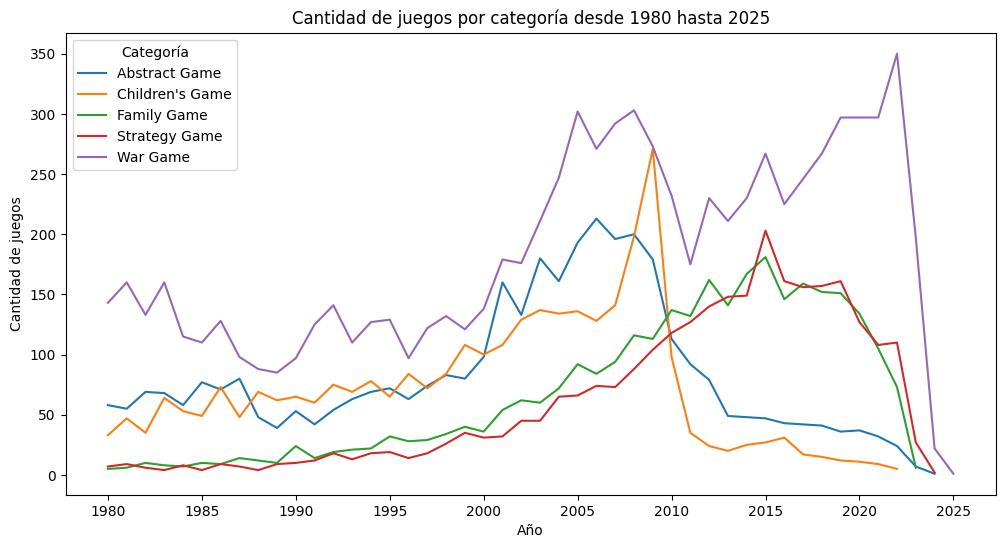

In [151]:
df_top_rango = df_top_5[df_top_5['Año'] <= 2025]
df_top_rango = df_top_rango[df_top_rango['Año'] >= 1980]
df_top_rango.head()

# Hecho con ayuda de esto'https://stackoverflow.com/a/51006642'.
df_top_rango = df_top_rango.pivot(index='Año', columns='Categoría', values='Cantidad')
df_top_rango.plot(figsize=(12, 6), title='Cantidad de juegos por categoría desde 1980 hasta 2025', xticks=np.arange(1980, 2030, 5))
plt.ylabel("Cantidad de juegos")

### ¿ha habido un cambio entre los juegos más comunes en los años 80 y hoy?
Para responder la pregunta, voy a considerar 'hoy' como 2020, dado a que después de eso no hay suficiente data para sacar conclusiones. Sí han habido cambios, como por ejemplo los '**Abstract Game**' y los '**Children's Game**' pasaron de segundo y tercer lugar a cuarto y quinto respectivamente. También se puede ver como los '**Family Game**' y los '**Strategy Game**' fueron lentamente aumentando en su popularidad hasta el 2015.

## Análisis Crítico
### ¿Qué limitaciones o problemas encontraste en los datos?
El mayor problema definitivamente fue la cantidad de valores en columnas con valor '**NaN**' que frecuentemente tuve que sacar si era necesario, y además de eso los años estaban en floats en vez de ints a pesar de ser todos floats con decimal de cero, y además la parte de nombre de artistas o diseñadores era un float si contenía multiples IDs de personas cuando fácilmente podría haber sido una lista con ints.